In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [32]:
df = pd.read_csv('tips (data for regression problem).csv')

Step 1: Load Data and Explore

In [33]:
print(df.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [34]:
# Get a summary of the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [35]:
# Check for missing values
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


Step 2: Basic Exploratory Data Analysis (EDA)

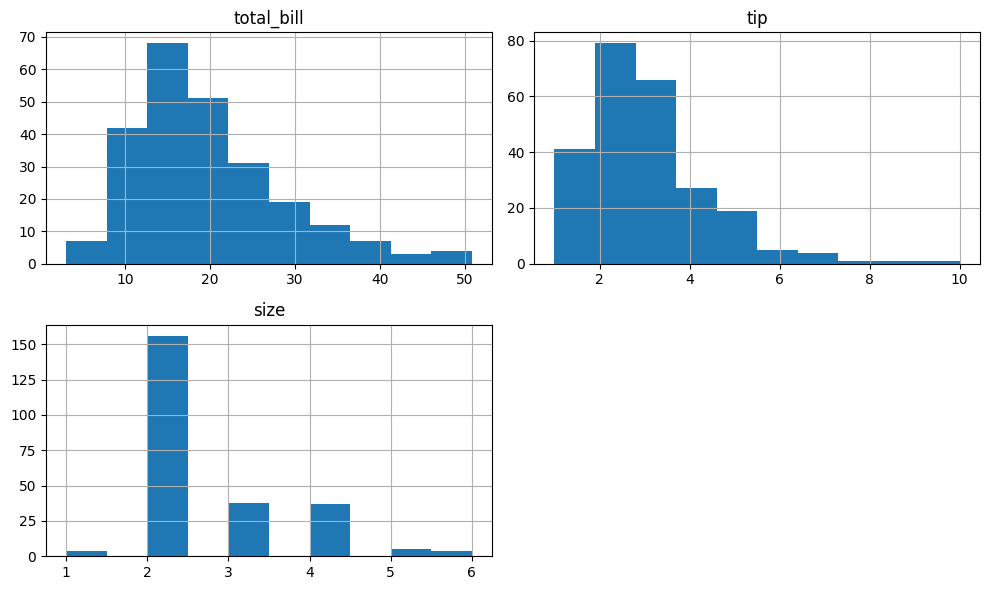

In [36]:
df.hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

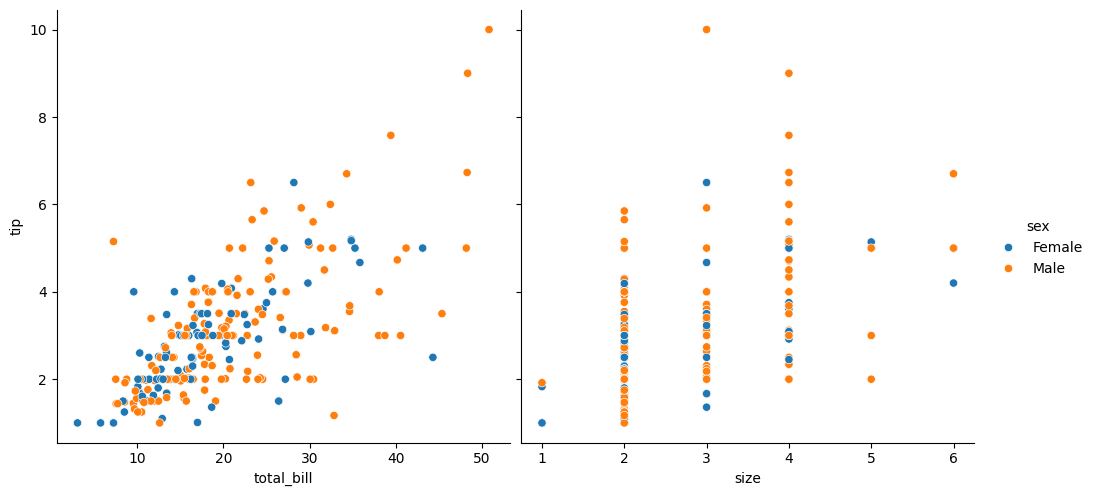

In [37]:
sns.pairplot(df, x_vars=['total_bill', 'size'], y_vars='tip', hue='sex', height=5)
plt.show()

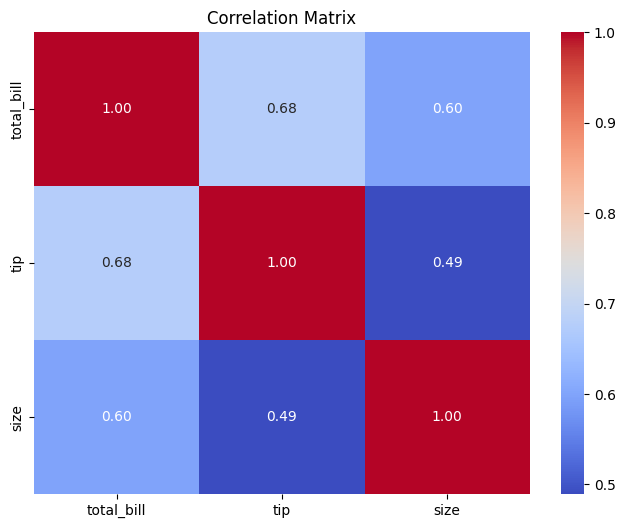

In [38]:
# Correlation matrix
plt.figure(figsize=(8, 6))

# Include only numerical features for correlation calculation

sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Step 3: Feature Engineering

In [39]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['sex', 'day', 'time'], drop_first=True)

# Display the transformed dataframe
print(df.head())

   total_bill   tip smoker  size  sex_Male  day_Sat  day_Sun  day_Thur  \
0       16.99  1.01     No     2     False    False     True     False   
1       10.34  1.66     No     3      True    False     True     False   
2       21.01  3.50     No     3      True    False     True     False   
3       23.68  3.31     No     2      True    False     True     False   
4       24.59  3.61     No     4     False    False     True     False   

   time_Lunch  
0       False  
1       False  
2       False  
3       False  
4       False  


In [40]:
# Create tip percentage feature
df['tip_pct'] = df['tip'] / df['total_bill']
print(df[['tip', 'total_bill', 'tip_pct']].head())

    tip  total_bill   tip_pct
0  1.01       16.99  0.059447
1  1.66       10.34  0.160542
2  3.50       21.01  0.166587
3  3.31       23.68  0.139780
4  3.61       24.59  0.146808


Step 4: Handle Missing Values

In [41]:
# Select only numerical columns before calculating the mean
numerical_cols = df.select_dtypes(include=np.number).columns

# Fill missing numerical values with column mean
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

missing_values = df.isnull().sum()
print(missing_values)

total_bill    0
tip           0
smoker        0
size          0
sex_Male      0
day_Sat       0
day_Sun       0
day_Thur      0
time_Lunch    0
tip_pct       0
dtype: int64


Step 5: Split the Data into Features and Target Variable

In [42]:
# Separate features and target variable
X = df.drop(['tip'], axis=1)
y = df['tip']

Step 6: Train-Test Split

In [43]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 7: Building and Evaluating Models

1. Linear Regression

In [44]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Convert 'smoker' column to numerical representation (0 for 'No', 1 for 'Yes')
X['smoker'] = X['smoker'].map({'No': 0, 'Yes': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = linear_model.predict(X_test)

# Calculate metrics
print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R^2:", r2_score(y_test, y_pred_lr))

Linear Regression Metrics:
MAE: 0.3487895652792181
MSE: 0.24265125670267848
R^2: 0.8058745445482829


2. Ridge and Lasso Regression

In [45]:
from sklearn.linear_model import Ridge, Lasso

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("\nRidge Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R^2:", r2_score(y_test, y_pred_ridge))

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

print("\nLasso Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R^2:", r2_score(y_test, y_pred_lasso))



Ridge Regression Metrics:
MAE: 0.5001364371900155
MSE: 0.4059555211673223
R^2: 0.6752281380668582

Lasso Regression Metrics:
MAE: 0.36817089821681764
MSE: 0.24709168136196796
R^2: 0.8023221233859239


3. Decision Tree Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)

print("\nDecision Tree Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_tree))
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("R^2:", r2_score(y_test, y_pred_tree))



Decision Tree Regression Metrics:
MAE: 0.4227410854451671
MSE: 0.37081165271901834
R^2: 0.7033438773445726


4. Random Forest Regression

In [47]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R^2:", r2_score(y_test, y_pred_rf))



Random Forest Regression Metrics:
MAE: 0.21814693877550986
MSE: 0.18020777591836676
R^2: 0.8558304743545646


5. Support Vector Regression (SVR)

In [48]:
from sklearn.svm import SVR

# Initialize and train the model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_svr = svr_model.predict(X_test)

print("\nSupport Vector Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R^2:", r2_score(y_test, y_pred_svr))



Support Vector Regression Metrics:
MAE: 0.5678411998407902
MSE: 0.5309794504776784
R^2: 0.5752067017489961


6. K-Nearest Neighbors Regression

In [49]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)

print("\nK-Nearest Neighbors Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_knn))
print("MSE:", mean_squared_error(y_test, y_pred_knn))
print("R^2:", r2_score(y_test, y_pred_knn))



K-Nearest Neighbors Regression Metrics:
MAE: 0.7033469387755101
MSE: 0.8652786938775511
R^2: 0.30776117616623744


Step 8: Compare Model Performances and Feature Importances

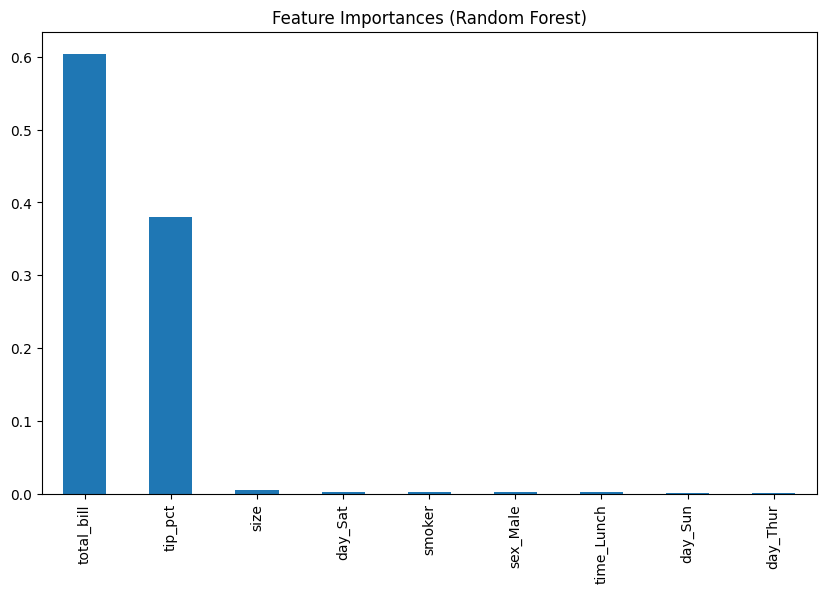

In [50]:
# Feature importance for Random Forest
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title("Feature Importances (Random Forest)")
plt.show()


Insights for Management

1. Key Factors Impacting Tips

Total Bill Amount: This is often one of the strongest predictors for tip amounts. Encouraging upselling and offering premium options could lead to larger bills and, consequently, higher tips. Staff training could focus on suggesting add-ons or higher-value items.

Time of Day and Day of Week: If analysis shows that tips are consistently higher at certain times or on specific days (e.g., weekends or evenings), management could optimize staffing and service efforts accordingly. For instance, scheduling experienced staff during high-tip periods may maximize customer satisfaction and tips.

Table Size: Larger parties might yield higher tip amounts. Offering special packages or services for larger groups could enhance the dining experience, potentially increasing tips.

2. Customer Service Strategy Recommendations

Personalized Customer Interaction: If staff behaviors like attentiveness, friendliness, or time spent with guests are correlated with higher tips (even indirectly), management might consider training to encourage personalized interactions. Employees could be incentivized based on customer feedback or observed service quality.

Reducing Wait Time: Longer wait times often correlate negatively with customer satisfaction and tipping behavior. Streamlining service flow, especially during peak hours, or offering guests appetizers or drinks during longer waits could improve the experience and encourage tipping.

Feedback Collection: Incorporate mechanisms to gather feedback on factors like service quality, wait time, and ambiance. This data can be used to further understand and adjust the customer experience, ultimately impacting tipping patterns.

3. Revenue Management and Forecasting
Dynamic Pricing and Menu Adjustments: If tip patterns vary significantly by the time of day, day of the week, or customer demographics, management could explore dynamic pricing on high-demand items or offering exclusive menu options during peak times. This can drive higher bills, subsequently increasing tip amounts.

Sales and Tip Forecasting: Use models like Random Forest (which likely performed well) to forecast tips and revenue for upcoming periods. This can aid in scheduling decisions, ensuring adequate staffing levels, and optimizing inventory.

Promotions for High-Tip Segments: Identify high-tip customer segments (e.g., business dinners or celebrations) and tailor promotions or loyalty programs to these groups. This could mean offering package deals for large groups, especially on typically lower-tip days to balance out revenue.

#2. Check if the data follows a linear trend using following methods :

Step 1: Scatter Plot

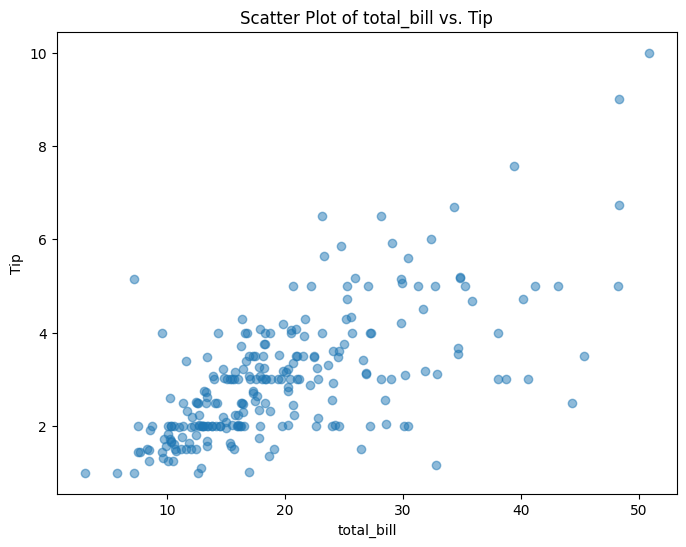

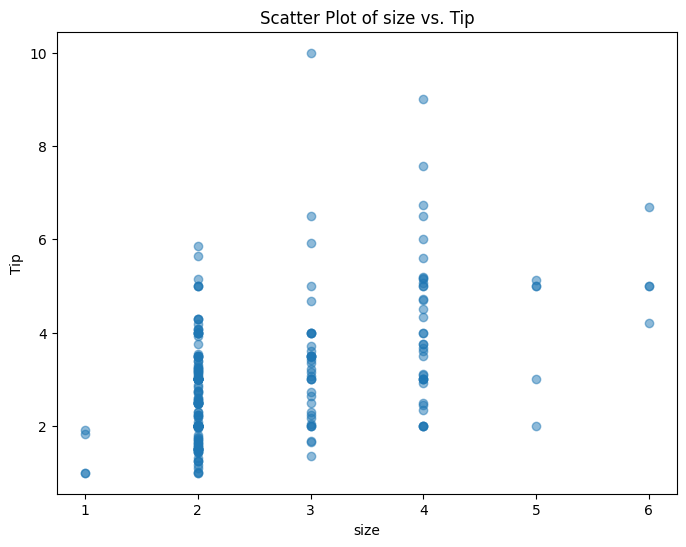

In [51]:
# Scatter plot for key features vs. target variable (tip)
features_to_plot = ['total_bill', 'size']  # Add other features as relevant

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['tip'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Tip')
    plt.title(f'Scatter Plot of {feature} vs. Tip')
    plt.show()


Step 2: Pair Plot for Multiple Features


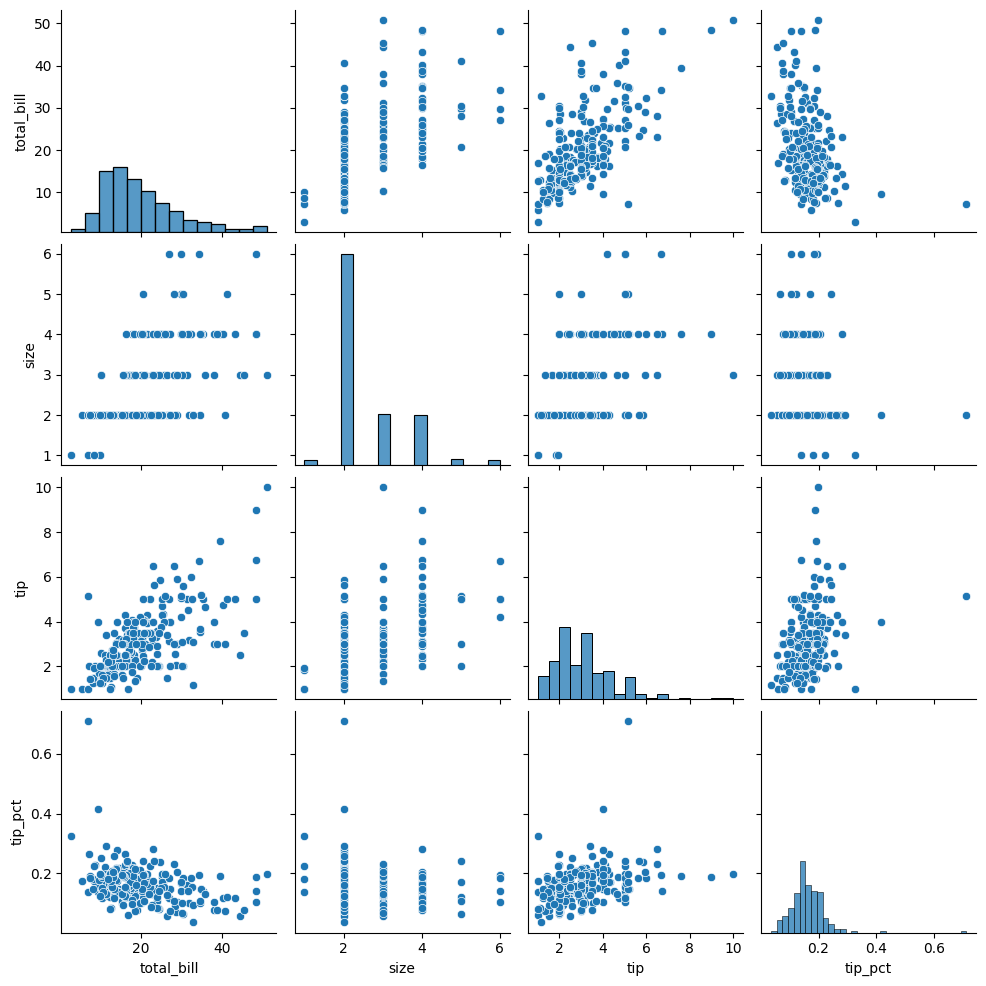

In [52]:
# Pair plot for all numerical features and target variable
sns.pairplot(df[['total_bill', 'size', 'tip', 'tip_pct']])  # Adjust features based on dataset
plt.show()

Step 3: Correlation Matrix (Heatmap)

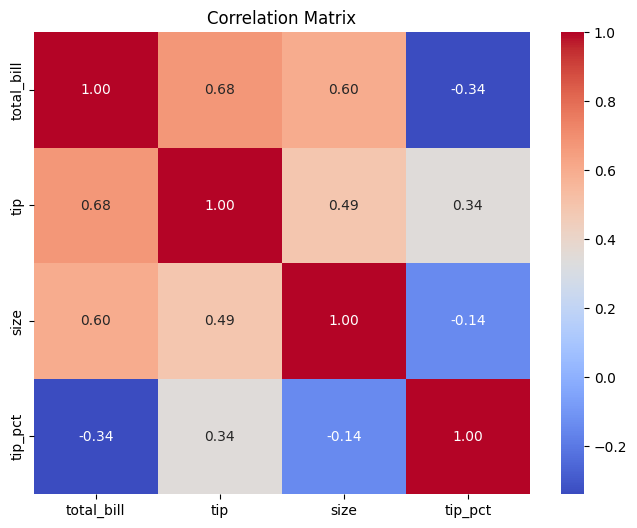

In [53]:
# Correlation matrix
plt.figure(figsize=(8, 6))

# Include only numerical features for correlation calculation

sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



Step 4: Statistical Test for Linearity (Rainbow Test)

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           9.67e-34
Time:                        15:01:35   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

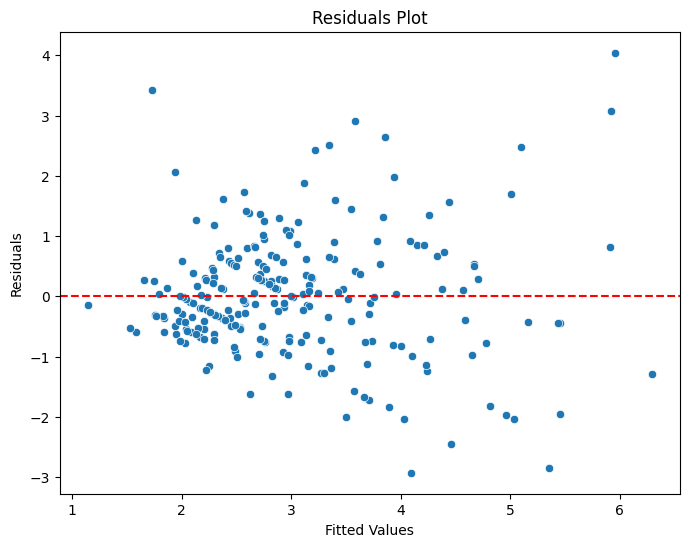

In [54]:
import statsmodels.api as sm

# Prepare data
X = df[['total_bill', 'size']]  # Select features
X = sm.add_constant(X)  # Add intercept
y = df['tip']

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())

# Plot residuals to visually inspect linearity assumption
residuals = model.resid
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Step 6: Line Plot (for Time-Series Data)

In [55]:
# Assuming 'date' is a column in the dataset and sorted by date
# If not, comment this out or modify accordingly
if 'date' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['tip'])
    plt.xlabel('Date')
    plt.ylabel('Tip')
    plt.title('Tip Amounts Over Time')
    plt.show()


Step 7: Choose Suitable Regression Method
Based on these analyses:

If data shows linearity (Rainbow test p-value > 0.05, residuals plot with random distribution around zero, high correlation coefficients): Use Linear Regression or Ridge/Lasso if multicollinearity exists.
If data shows non-linearity (Rainbow test p-value <= 0.05, residuals plot shows patterns, weak linear correlations): Consider Decision Trees, Random Forests, or Support Vector Regression (SVR) for non-linear relationships.


Step 8: Check Model Prediction Accuracy

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

print("Linear Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R^2:", r2_score(y_test, y_pred_lr))

# Random Forest Regression Model (for non-linear trend)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Regression Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R^2:", r2_score(y_test, y_pred_rf))


Linear Regression Metrics:
MAE: 0.3487895652792181
MSE: 0.24265125670267848
R^2: 0.8058745445482829

Random Forest Regression Metrics:
MAE: 0.21814693877550986
MSE: 0.18020777591836676
R^2: 0.8558304743545646
